# How to annotate the Graphs?

    https://towardsdatascience.com/finally-learn-to-annotate-place-text-in-any-part-of-the-plot-d9bcc93c153f

In [3]:
# Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Reading Data Set

nobel=pd.read_csv('./dataset/nobel_prize_winner.csv',parse_dates=['Birth Date'])
stock=pd.read_csv('./dataset/prices-split-adjusted.csv',parse_dates=['date'],index_col='date')
cars = sns.load_dataset('mpg')

## Basic Text Control

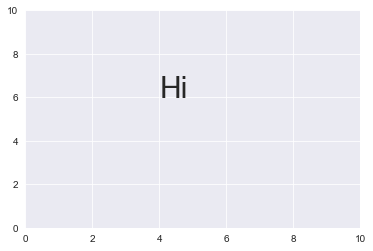

In [22]:
# Setting up style
sns.set_style('darkgrid')

# create an empty plot
fig,ax = plt.subplots()

# Setting up x and y limit
ax.set(xlim=(0, 10), ylim=(0, 10))

# Placing the Text
ax.annotate(text='Hi',xy=(4,6),xycoords='data',size=30)

#ax.annotate(text='Hi', xy=(4, 6), xycoords='data')


plt.show()

To place the text, we should first set the coordinate type. There are several types available in Matplotlib but the most intuitive and easy one is data. By setting xycoords to data, we are telling that we want to locate points depending on the values of x and y axis. Also, we want the origin of the coordinates at (0, 0). So, when I locate the point (2, 2) from our empty figure, I am telling you to count the units based on our axis ticks. There are options to set the coordinates for pixels or the fraction of axis length but it is hard to work in those coordinates. So, for the rest of the article, we will stick to data.

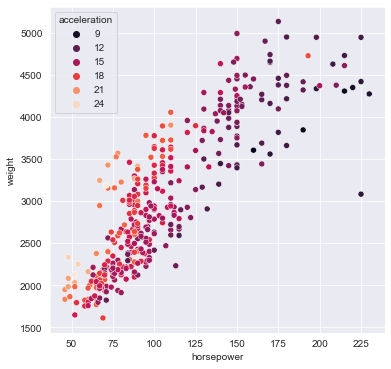

In [25]:
# Creating a scatter plot from Car Dataset

fig,ax = plt.subplots(figsize=(6,6))

sns.scatterplot(x='horsepower',
               y='weight',
               data=cars,
               hue='acceleration',
               ax=ax,
               palette='rocket')
plt.show()

In [27]:
# Filtering the cars with acceleration less than 9 Seconds

fastest_cars = cars.query('acceleration <9')
fastest_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340


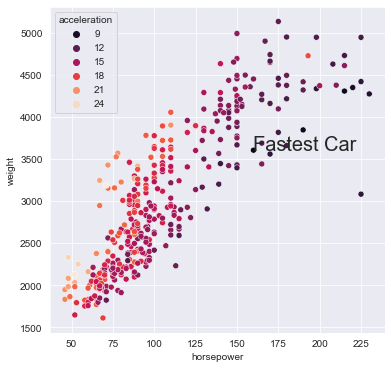

In [30]:
# Anotating for Fastest Car

fig,ax = plt.subplots(figsize=(6,6))

sns.scatterplot(x='horsepower',
               y='weight',
               data=cars,
               hue='acceleration',
               ax=ax,
               palette='rocket')

ax.annotate(text='Fastest Car',xy=(160,3609),xycoords='data',size=20)

plt.show()

We want to move the text Hi to some other location but still referencing the point (4, 6). To do that we will use two other parameters, xytext and textcoords. I will move the text a little to the left and a little above and still keep the original text for comparison:

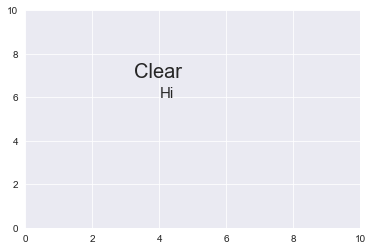

In [46]:
sns.set_style('darkgrid')

fig,ax=plt.subplots()
ax.set(xlim=(0,10),ylim=(0,10))
# Annotation to a fixed point
ax.annotate(text='Hi',xy=(4,6),size=15)

# Annotation to a different point for clear visibility 

ax.annotate(text='Clear',xy=(4,6),xycoords = 'data',
           xytext=(-25,20),
           textcoords='offset points',size=20)

plt.show()

textcoords='offset points'

#when I set xytext to (-25, 20), I am telling the text to move 15 points 
#in the left direction and 20 points upwards relative to (4, 6)

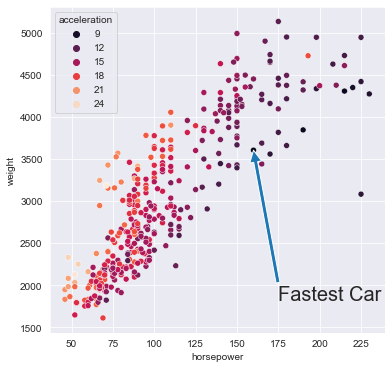

In [58]:
# Adding Arrow to the car data set for Fastest Car point

fig,ax = plt.subplots(figsize=(6,6))

sns.scatterplot(x='horsepower',
               y='weight',
               data=cars,
               hue='acceleration',
               ax=ax,
               palette='rocket')

ax.annotate(text='Fastest Car',xy=(160,3609),xycoords='data',
            xytext=(25,-150),
            textcoords=('offset points'),
            arrowprops = {},
            size=20)

plt.show()

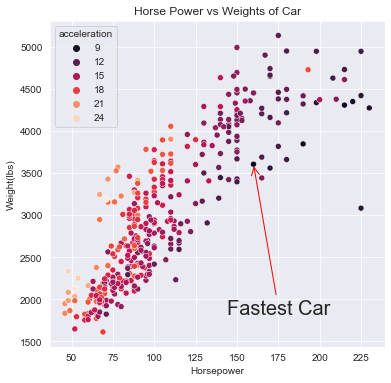

In [69]:
# Adding allignment to the arrow

fig,ax = plt.subplots(figsize=(6,6))

sns.scatterplot(x='horsepower',
               y='weight',
               data=cars,
               hue='acceleration',
               ax=ax,
               palette='rocket')

ax.annotate(text='Fastest Car',xy=(160,3609),xycoords='data',
            xytext=(25,-150),
            textcoords=('offset points'),
            arrowprops =dict(arrowstyle = '->',color='red'),
            horizontalalignment='center',
            size=20)

# Adding lables in a single code
ax.set(xlabel='Horsepower',
       ylabel='Weight(lbs)',
       title='Horse Power vs Weights of Car')

plt.show()

## Putting a box arround the Text

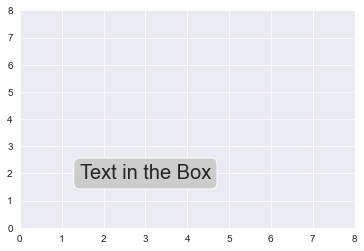

In [75]:
fig,ax=plt.subplots()
# Setting x and y axis limit
ax.set(xlim=(0,8),ylim=(0,8))

ax.annotate('Text in the Box',
           xy=(3,2),
           xycoords='data',
           bbox=dict(boxstyle='round',fc='0.8'),
           ha='center',
           va='center',size=20)

plt.show()

In [77]:
# Working with Stock Data

stock.head(3)

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


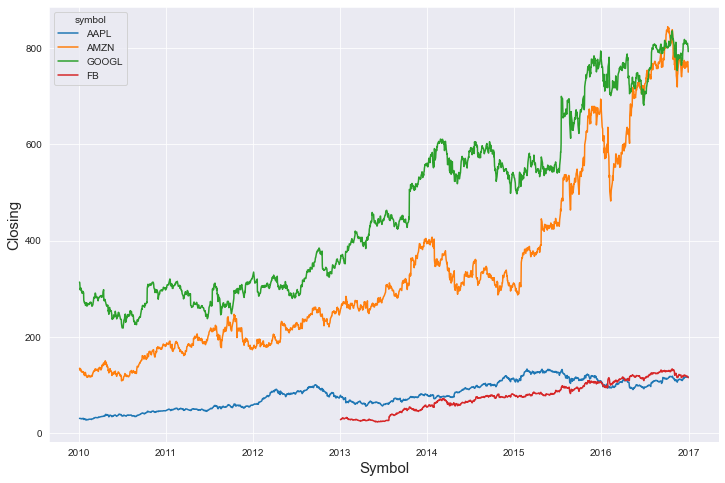

In [89]:
# Filtering only 4 stocks for easy calculation and plotting 

big_four = stock[stock['symbol'].isin(['AMZN','GOOGL','FB','AAPL'])]

# Creating line plot for these four Companies

fig,ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=big_four.index,y='close',hue='symbol',data=big_four , ax=ax)

plt.xlabel('Symbol',size=15)
plt.ylabel('Closing', size=15)
plt.show()

In [98]:
amazon_stock = big_four.query('symbol == "AMZN"').reset_index()[['date','symbol','close']].set_index('date')

google_stock = big_four.query('symbol == "GOOGL"').reset_index()[['date','symbol','close']].set_index('date')

# Merging two dataframe

amzn_ggl = amazon_stock.merge(google_stock,on='date',suffixes=('_amzn','_ggl'))

In [ ]:
# Subsetng for rows where close price match

price_match= 

In [107]:
# Subset for rows where close prices match
price_match = amzn_ggl[
      ((amzn_ggl['close_amzn'] - amzn_ggl['close_ggl']) < 1)
      & ((amzn_ggl['close_ggl'] < amzn_ggl['close_amzn']))
  ]
price_match

,symbol_amzn,close_amzn,symbol_ggl,close_ggl
date,,,,
2016-06-22,AMZN,710.599976,GOOGL,710.469971
2016-10-26,AMZN,822.590027,GOOGL,822.099976
2016-11-22,AMZN,785.330017,GOOGL,785.000000
2016-11-25,AMZN,780.369995,GOOGL,780.229980


For Facebook and Apple, close prices with the difference of 1 are on many days. To find the earliest date that Facebook surpassed Apple, we will use another function called nsmallest() which returns the n smallest values from a dataframe column:

In [108]:
price_match.reset_index().nsmallest(n=1, columns='date')

,date,symbol_amzn,close_amzn,symbol_ggl,close_ggl
0,2016-06-22,AMZN,710.599976,GOOGL,710.469971


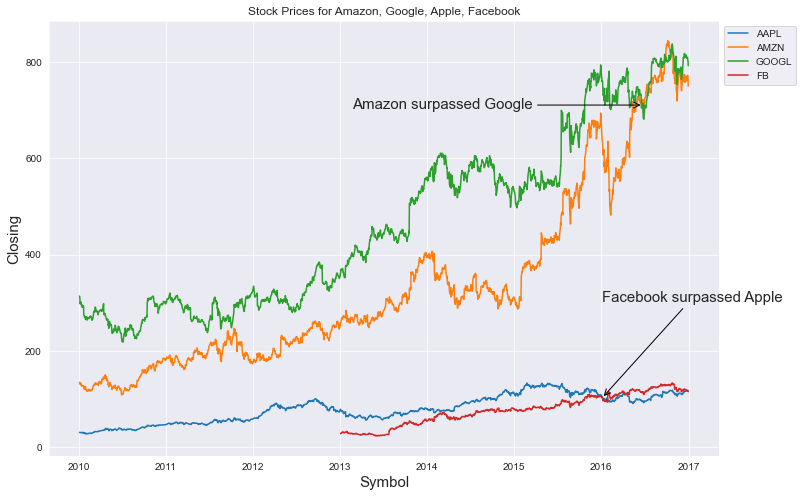

In [118]:
# Creating line plot for these four Companies

fig,ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=big_four.index,y='close',hue='symbol',data=big_four , ax=ax)

# Annotate Amazon > Google

ax.annotate('Amazon surpassed Google',
            xy=('2016-06-22', 710.599976),
            xycoords='data',
            xytext=(-200, 0),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha ='center',
            va='center',
            fontsize=15)
# Annotate Facebook > Apple
ax.annotate('Facebook surpassed Apple',
            xy=('2016-01-05', 102.730003),
            xycoords='data',
            xytext=(0, 100),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            va='center',
            ha='left',
            fontsize=15)

# Move the legend outside of the axes
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Final styling
ax.set(xlabel='Date',
       ylabel='Close Prices of Stocks',
       title='Stock Prices for Amazon, Google, Apple, Facebook')

plt.xlabel('Symbol',size=15)
plt.ylabel('Closing', size=15)
plt.show()

# Annotation in Bar chart

In [120]:
nobel.head(2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


In [ ]:
nobel.drop([
    'organization_name', 'organization_city', 'organization_country',
    'motivation', 'death_date', 'death_country', 'death_city'
], inplace=True, axis='columns')

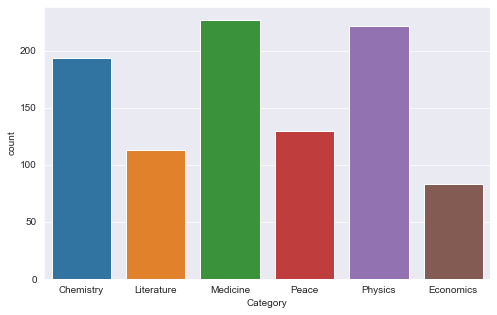

In [129]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(nobel['Category'])
plt.show()